In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve

In [3]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv")

In [4]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [5]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

In [6]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [7]:
# outlier removal
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)


# the function is empty means 
# it will take the default argumrnts 
# with out hyperparameter tuning

DecisionTreeClassifier()

In [10]:
DT.get_params() # to get all hyperparameter of models

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
# prediction
y_prediction = DT.predict(x_test)

In [12]:
# model evalutation
print(y_test.values[:20])
print(y_prediction[:20])

[0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0]
[1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0]


In [13]:
DT_accurecy = accuracy_score(y_test,y_prediction)
DT_accurecy

0.7466390899689762

In [14]:
confusion_matrix(y_test,y_prediction)

array([[205, 123],
       [122, 517]], dtype=int64)

In [15]:
confusion_matrix(y_test,y_prediction).ravel()
# TN, FP, FN, TP

array([205, 123, 122, 517], dtype=int64)

In [16]:
TN, FP, FN, TP = confusion_matrix(y_test,y_prediction).ravel()

In [17]:
# Precision TP/(TP+FP)
precision = TP/(TP+FP)
precision

0.8078125

In [18]:
# recall TP/(TP+FN)
recall = TP / (TP+FN)
recall

0.809076682316119

In [19]:
# F1 Score (2*precision * recall)/ (precision+recall)
F1Score = (2*precision*recall) / (precision+recall)
F1Score

0.8084440969507427

In [20]:
acc= accuracy_score(y_test,y_prediction)
pre = precision_score(y_test,y_prediction)
recl = recall_score(y_test,y_prediction)
f1scor = f1_score(y_test,y_prediction)
print(acc)
print(pre)
print(recl)
print(f1scor)

0.7466390899689762
0.8078125
0.809076682316119
0.8084440969507427


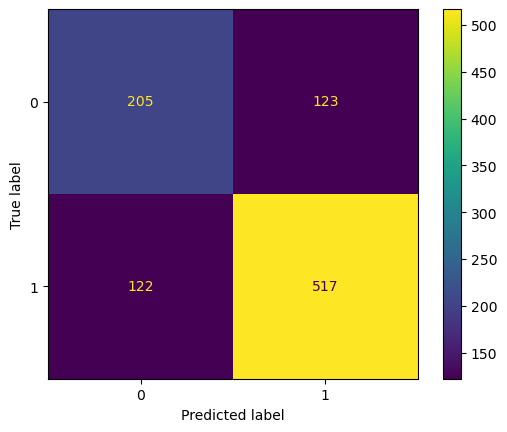

In [21]:
cmt = confusion_matrix(y_test,y_prediction)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)

In [22]:
DT.predict_proba(x_test)
# NO   YES
# [0    1] == max : 1  === yes : 1
# [1    0] == max : 1 ==== no :  0
# [0    1] == max : 1  === yes : 1

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:
y_predict_probability = DT.predict_proba(x_test)

roc auc curve  calculated on probability of prediction 

roc-auc curve : FPR vs TPR
y_predict_probability 

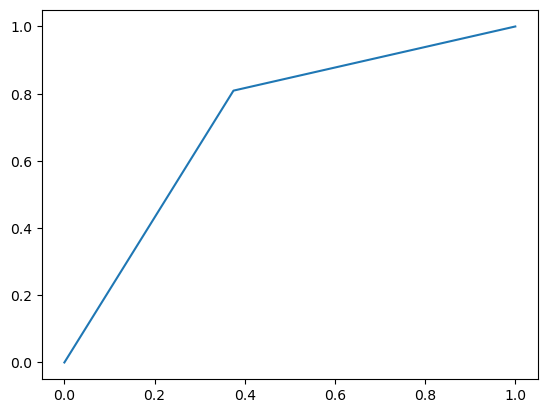

In [24]:
fpr, tpr, thershold = roc_curve(y_test,y_predict_probability[:,1])
plt.plot(fpr,tpr)

In [25]:
# step 1
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

# step 2



DecisionTreeClassifier()

accuray is: 75.18
F1 is: 0.82
Precision is: 0.83
Recall is: 0.8


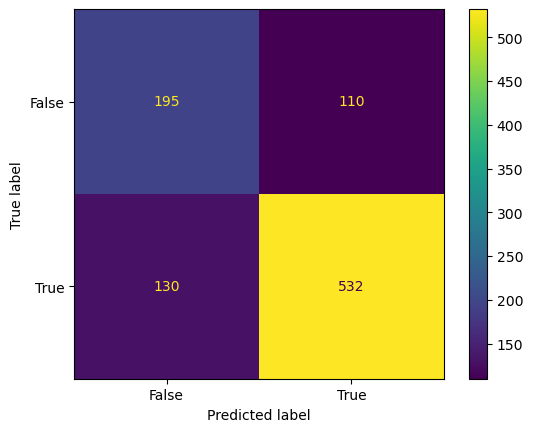

True negative: 195
False postive: 110
False negative: 130
True postive: 532


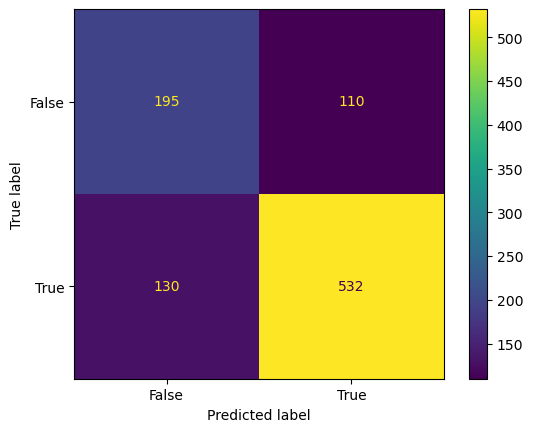

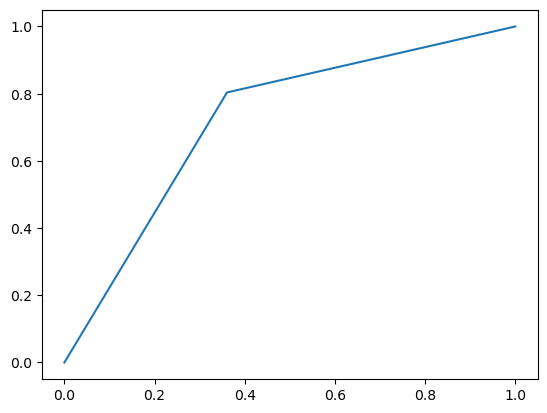

In [26]:
### step-1 divide the data into input and target columns
x=df.drop('Customer Status', axis = 1)
y=df['Customer Status']

### step-2 divide the data into 4 parts
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### step-3 outlier analysis

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

### step 4 - train the model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

### step 5 - Predictions

y_pred_dt = dtree.predict(x_test)

### step 6-  Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

### step 7 - confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cmt, display_labels = [False, True])

disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

disp.plot()
plt.show()
#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Decision Tree 
**Without hyperparameter Tuning**

accuracy_score 74.56
f1_score 0.8
precision_score 0.82
recall_score 0.78


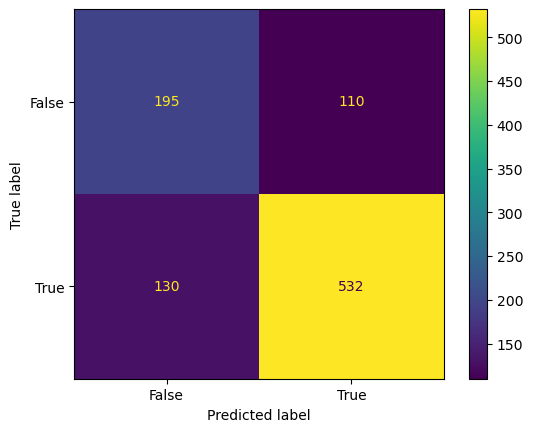

True Negative 221
False Positive 109
False Negative 137
True Positive 500


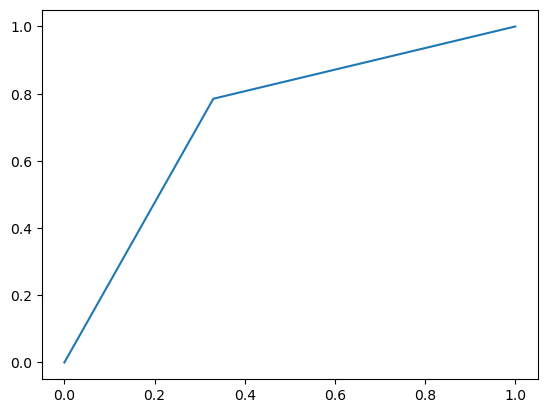

In [27]:
# =======================Divide the data into input and target ===========================

x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

# ========================= Train Test Split ====================================

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# ======================== Outlier analysis based on z-score ==========================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

thershold = 3

outlier_indices = np.where(z_scores > thershold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ============================= Train the Model ============================
from sklearn.tree import DecisionTreeClassifier

DT  = DecisionTreeClassifier()

DT.fit(x_train,y_train)

# =============================== Prediction ==============================

y_pred_dt = DT.predict(x_test)

# =============================== Metrics =================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_score_dt = round(accuracy_score(y_test,y_pred_dt) * 100,2)
f1_dt = round(f1_score(y_test, y_pred_dt),2)
precision_dt = round(precision_score(y_test, y_pred_dt),2)
recall_dt = round(recall_score(y_test,y_pred_dt),2)

print('accuracy_score', accuracy_score_dt)
print('f1_score', f1_dt)
print('precision_score', precision_dt)
print('recall_score',recall_dt)

# ============================= Confusion Matrics ====================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmt = confusion_matrix(y_test,y_pred_dt)

cmt_disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()

print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
print('True Positive', tp)

# ==================================== ROC-AUC Curve =================================

y_pred_dt_prob = DT.predict_proba(x_test)[:,1]

fpr, tpr, thershold = roc_curve(y_test, y_pred_dt_prob) # it required y_prediction_probability not just y_prediction
plt.plot(fpr,tpr)
plt.show()


### Logistic Regression 
**Without hyperparameter tuning**

c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 74.66
f1_score 0.81
precision_score 0.79
recall_score 0.83


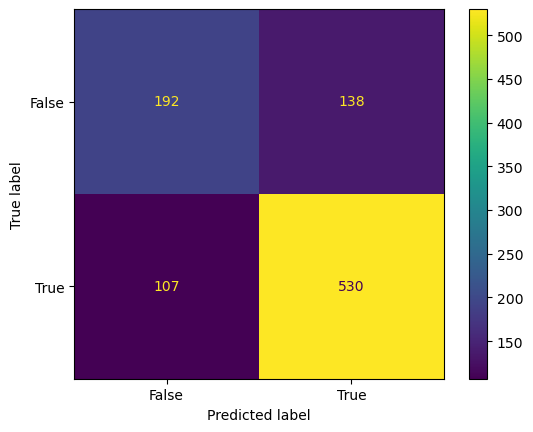

True negative: 192
False postive: 138
False negative: 107
True postive: 530


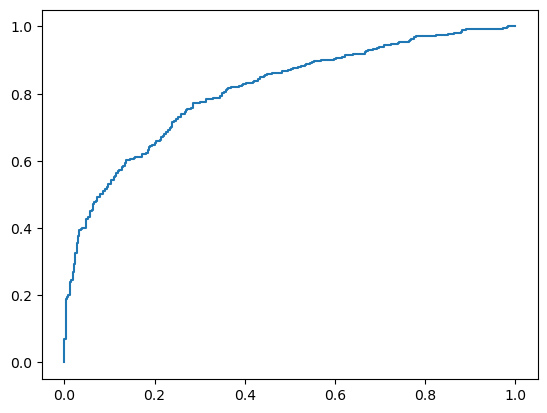

In [28]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=123)

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

LogR.fit(x_train,y_train)

y_pred_logr = LogR.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_LogR = round(accuracy_score(y_test, y_pred_logr)*100,2)
f1_LogR = round(f1_score(y_test,y_pred_logr),2)
precision_LogR = round(precision_score(y_test, y_pred_logr),2)
recall_LogR = round(recall_score(y_test,y_pred_logr),2)

print('accuracy_score', acc_LogR)
print('f1_score', f1_LogR)
print('precision_score', precision_LogR)
print('recall_score',recall_LogR)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cmt_LogR = confusion_matrix(y_test, y_pred_logr)

cmt_LogR_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_LogR, display_labels=[False, True])

cmt_LogR_disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logr).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

y_pred_LogR_prob = LogR.predict_proba(x_test)[:,1]
fpr, tpr, thershold = roc_curve(y_test, y_pred_LogR_prob)
plt.plot(fpr,tpr)
plt.show()



### Naive Bayes
**Without hyperparameter tuning**

accuray is: 75.59
F1 is: 0.8
Precision is: 0.85
Recall is: 0.76


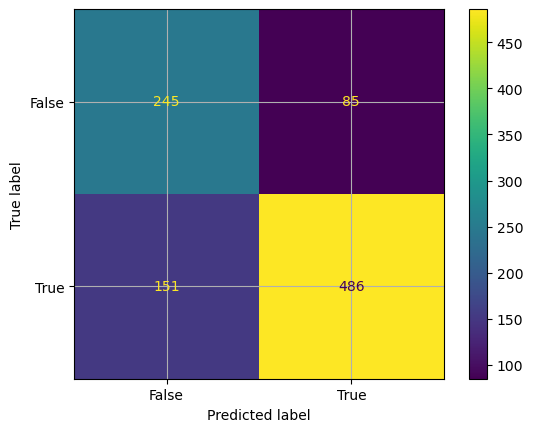

True negative: 245
False postive: 85
False negative: 151
True postive: 486


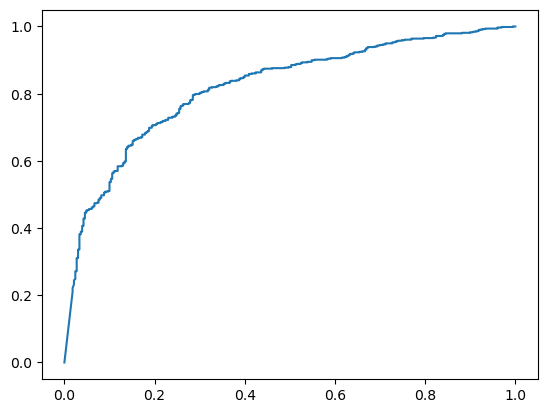

In [29]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])


from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)

y_pred_NB = NB.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_NB = round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB = round(f1_score(y_test, y_pred_NB),2)
precision_NB = round(precision_score(y_test,y_pred_NB),2)
recall_NB =round(recall_score(y_test, y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmt_NB = confusion_matrix(y_test, y_pred_NB)

cmt_NB_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_NB, display_labels=[False,True])

cmt_NB_disp.plot()
plt.grid()
plt.show()

tn,fp,fn,tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

y_pred_NB_prob = NB.predict_proba(x_test)[:,1]

fpr, tpr, thershold = roc_curve(y_test, y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()



### KNN
**Without hyperparameter tuning**

In [30]:
# pip uninstall scikit-learn
# pip install scikit-learn==1.2.2


In [31]:
# x = df.drop('Customer Status',axis=1)
# y = df['Customer Status']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# from scipy import stats

# # Define the columns for which you want to remove outliers
# selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
#                     'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# # Calculate the Z-scores for the selected columns in the training data
# z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# # Set a threshold value for outlier detection (e.g., 3)
# threshold = 3

# # Find the indices of outliers based on the threshold
# outlier_indices = np.where(z_scores > threshold)[0]

# # Remove the outliers from the training data
# x_train = x_train.drop(x_train.index[outlier_indices])
# y_train = y_train.drop(y_train.index[outlier_indices])

# from sklearn.neighbors import KNeighborsClassifier

# KNN = KNeighborsClassifier()
# KNN.fit(x_train,y_train)

# y_pred_knn = KNN.predict(x_test.values)

# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)
# f1_knn = round(f1_score(y_test, y_pred_knn),2)
# precision_knn = round(precision_score(y_test,y_pred_knn),2)
# recall_knn =round(recall_score(y_test, y_pred_knn,2))

# print("accuray is:",acc_knn)
# print("F1 is:",f1_knn)
# print("Precision is:",precision_knn)
# print("Recall is:",recall_knn)

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cmt_knn = confusion_matrix(y_test, y_pred_knn)

# cmt_knn_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_knn, display_labels=[False,True])

# cmt_knn_disp.plot()
# plt.grid()
# plt.show()

# tn,fp,fn,tp = confusion_matrix(y_test,y_pred_knn).ravel()
# print("True negative:",tn)
# print("False postive:",fp)
# print("False negative:",fn)
# print("True postive:",tp)

# y_pred_knn_prob = KNN.predict_proba(x_test)[:,1]

# fpr, tpr, thershold = roc_curve(y_test, y_pred_knn_prob)
# plt.plot(fpr,tpr)
# plt.show()

In [32]:
# X = df.drop('Customer Status', axis=1)
# y = df['Customer Status']


# # ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# # ========================Step-3: Outlier analysis based on z-score========================================

# from scipy import stats
# selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
#                     'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
# z_scores = np.abs(stats.zscore(X_train[selected_columns]))
# threshold = 3
# outlier_indices = np.where(z_scores > threshold)[0]
# X_train = X_train.drop(X_train.index[outlier_indices])
# y_train = y_train.drop(y_train.index[outlier_indices])

# # ===============================Step-4:  Train the Model===================================================

# from sklearn.neighbors import KNeighborsClassifier
# KN=KNeighborsClassifier()
# KN.fit(X_train, y_train)

# # =============================Step-5:  Predictions============================================================

# y_pred_log=KN.predict(X_test)

# # ============================ Step-6: Metrics==================================================================

# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
# acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
# f1_log=round(f1_score(y_test,y_pred_log),2)
# precision_log=round(precision_score(y_test,y_pred_log),2)
# recall_log=round(recall_score(y_test,y_pred_log),2)
# print("accuray is:",acc_log)
# print("F1 is:",f1_log)
# print("Precision is:",precision_log)
# print("Recall is:",recall_log)

# # ================================Step-7:Confusion matrix=========================================================================
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cmt=confusion_matrix(y_test,y_pred_log)

# disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
#                             display_labels = [False, True])
# disp.plot()
# plt.grid(False)
# plt.show()


# tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
# print("True negative:",tn)
# print("False postive:",fp)
# print("False negative:",fn)
# print("True postive:",tp)

# #=======================================Step-8: ROC-AUC curve================================================================

# y_log_pred_prob=KN.predict_proba(X_test)[:,1]   # Class-1 probabilities
# fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
# plt.plot(fpr,tpr)
# plt.show()

In [33]:
# # import packages 
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(color_codes=True)                   # To get diffent different colors
# pd.set_option('display.max_columns', None)       # To display the max columns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# # read
# df = pd.read_csv(r'C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv')

# # 
# X = df.drop('Customer Status', axis=1)
# y = df['Customer Status']
# ## 
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# ## outliers
# from scipy import stats

# # Define the columns for which you want to remove outliers
# selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
#                     'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# # Calculate the Z-scores for the selected columns in the training data
# z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# # Set a threshold value for outlier detection (e.g., 3)
# threshold = 3

# # Find the indices of outliers based on the threshold
# outlier_indices = np.where(z_scores > threshold)[0]

# # Remove the outliers from the training data
# X_train = X_train.drop(X_train.index[outlier_indices])
# y_train = y_train.drop(y_train.index[outlier_indices])

# # model
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier()
# KNN.fit(X_train,y_train)

# #####################################################################################################3

# X_test_array = X_test.to_numpy()
# y_predictions = KNN.predict(X_test_array)


# #########################################################################################################3
# tn,fp,fn,tp=confusion_matrix(y_test,y_predictions).ravel()


# acc_knn=round(accuracy_score(y_test,y_predictions)*100,2)
# pre_knn=round(precision_score(y_test,y_predictions)*100,2)
# rec_knn=round(recall_score(y_test,y_predictions)*100,2)
# f1_knn=round(f1_score(y_test,y_predictions)*100,2)

# print("accuracy is",acc_knn)
# print("prescision is",acc_knn)
# print("recall is",acc_knn)
# print("f1 score is",acc_knn)

# ##################################################################################################################

# cmt=confusion_matrix(y_test,y_predictions)
# ConfusionMatrixDisplay(cmt).plot()
# plt.grid(False)
# plt.show()

# tn, fp, fn, tp = confusion_matrix(y_test,y_predictions).ravel()
# print("True negative:",tn)
# print("False postive:",fp)
# print("False negative:",fn)
# print("True postive:",tp)

# ####################################################################################

# y_predict_prob = KNN.predict_proba(X_test_array)


# #####################################################################################3

# fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob[:,1])
# plt.plot(fpr,tpr)
# plt.show()

c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy is 73.73
prescision is 0.79
recall is 0.84
f1 score is 0.81


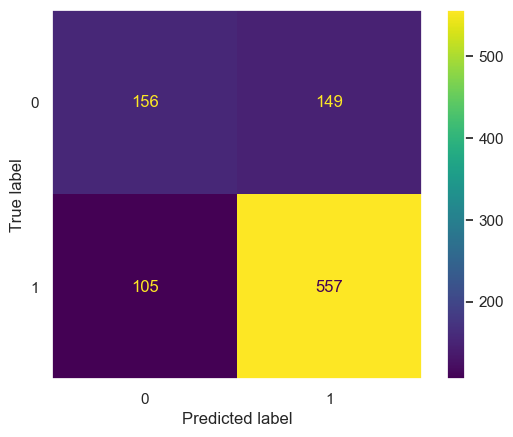

True negative: 156
False postive: 149
False negative: 105
True postive: 557


c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


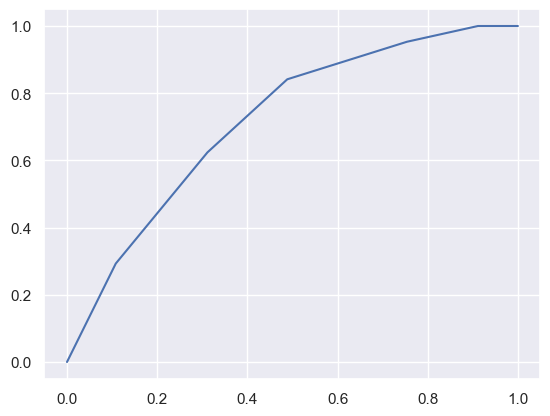

In [34]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)                   # To get diffent different colors
pd.set_option('display.max_columns', None)       # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# read
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv")

# 
X = df.drop('Customer Status', axis=1)
y = df['Customer Status']
## 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## outliers
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

#####################################################################################################3

y_predictions = KNN.predict(X_test.values)

#########################################################################################################3
tn,fp,fn,tp=confusion_matrix(y_test,y_predictions).ravel()


acc_knn=round(accuracy_score(y_test,y_predictions)*100,2)
pre_knn=round(precision_score(y_test,y_predictions),2)
rec_knn=round(recall_score(y_test,y_predictions),2)
f1_knn=round(f1_score(y_test,y_predictions),2)

print("accuracy is",acc_knn)
print("prescision is",pre_knn)
print("recall is",rec_knn)
print("f1 score is",f1_knn)

##################################################################################################################

cmt=confusion_matrix(y_test,y_predictions)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_predictions).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

####################################################################################

y_predict_prob = KNN.predict_proba(X_test.values)


#####################################################################################3

fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob[:,1])
plt.plot(fpr,tpr)
plt.show()

### Hypereparameter Tuning
parameter : it is given by model
            in the process of develovement , some parameter will evolve


Hyper-Parameter means : Model Function and Arguments

In [35]:
import pandas as pd
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score

In [36]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [37]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status'] 


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
DT.get_params() # this is all the hyperparameter of decision tree

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

- Criterion: Determines the function to measure the quality of a split, such as Gini impurity or entropy.
- Max_depth: Controls the maximum depth of the tree to avoid overfitting.
- Min_samples_split: Specifies the minimum number of samples required to split an internal node.
- Min_samples_leaf: Specifies the minimum number of samples required to be at a leaf node.
- Max_features: Determines the number of features to consider when looking for the best split to reduce overfitting.
- Min_impurity_decrease: Specifies the minimum impurity decrease required for a split to happen.
- Splitter: Specifies the strategy used to choose the split at each node, either "best" or "random".
- ccp_alpha: Cost-Complexity Pruning alpha, used for Minimal Cost-Complexity Pruning to prevent overfitting by adjusting the complexity of the tree.
- class_weight: Handles class imbalance by assigning weights to classes, automatically or manually.
- max_leaf_nodes: Sets the maximum number of leaf nodes to control overfitting by limiting the size of the tree.
- min_weight_fraction_leaf: Specifies the minimum weighted fraction of samples required to be at a leaf node, similar to min_samples_leaf.
- random_state: Seed for the random number generator, ensuring reproducibility of results when random processes are involved.

In [40]:
param_grid = {
    'criterion': ['gini', 'entropy'], # 2
    'max_depth': [3,4,5,6,7,8], # 6
    'min_samples_split': [2,3,4], #3
    'min_samples_leaf': [1,2,3,4], # 4
    'random_state': [0,42] # 2
}
# 2*6*3*4*2 = 288

In [41]:
grid_search = GridSearchCV(DT, param_grid, scoring='accuracy', cv = 5, verbose=True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [42]:
import time
start = time.time()
grid_search.fit(x_train, y_train) # fit the grid search
end= time.time()
print("total time taken: ", (end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


total time taken:  138.14553689956665


In [43]:
# grid_search.<Tab> # explore other methods 

In [44]:
grid_search.best_estimator_

# best estimator is your model 
# if you 

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=0)

In [45]:
grid_search.best_score_

0.7955076198976437

In [46]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [47]:
accuracy_list = cross_val_score(grid_search.best_estimator_,
                                x_train,
                                y_train,
                                cv = 5,
                                scoring='accuracy')
accuracy_list

array([0.79844961, 0.78294574, 0.78165375, 0.81630013, 0.79818887])

In [48]:
accuracy_list.mean() # this should be equal to the grid_search.best_estimator_ value

# then is consider our 

0.7955076198976437

- step1: we created a base model
       - with default parameters
- step2: we created a parameters dicitonary file
- step3: we apply GridSearchCV
       - we use base model and parameter dictionary file
       - Inside the GridSearchCV
- step4: we need to pass the data on GridSearchCV
- step5: Then after so many combinations check
       - best estimators [ best model] 
       - best score
       - best parameters
- step6: (optional) cross validation score
       - if we pass the best estimator model for cv = 5
       - The mean accuracy = Best score

In [49]:
# # All in  one shot

# # ======================== Step 1 get the best model ===============================================

# from sklearn.model_selection import DecisionTreeClassifier

# DT = DecisionTreeClassifier()
# DT.fit(x_train,y_train)

### Now we again develope thne model with the best patameter that we get from the typerparameter tuning 
- use this code to get the best hyperparameter for the model
- then again develope model with these parameter only
- grid_search.best_params_

In [74]:
from sklearn.tree import DecisionTreeClassifier

x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 4, min_samples_split= 2, random_state= 0)

DT.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=0)

In [75]:
y_pred = DT.predict(x_test)

# tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()


acc_dt= accuracy_score(y_test,y_pred)*100
pre_dt= precision_score(y_test,y_pred)
rec_dt= recall_score(y_test,y_pred)
f1_dt= f1_score(y_test,y_pred)

print("accuracy is",acc_dt)
print("prescision is",pre_dt)
print("recall is",rec_dt)
print("f1 score is",f1_dt)


accuracy is 78.1799379524302
prescision is 0.823262839879154
recall is 0.8528951486697965
f1 score is 0.8378170637970791


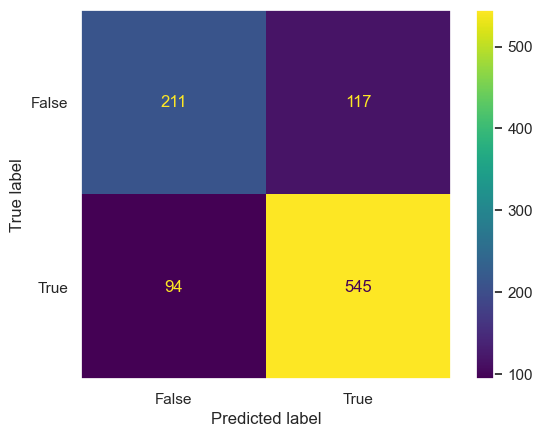

True negative: 211
False postive: 117
False negative: 94
True postive: 545


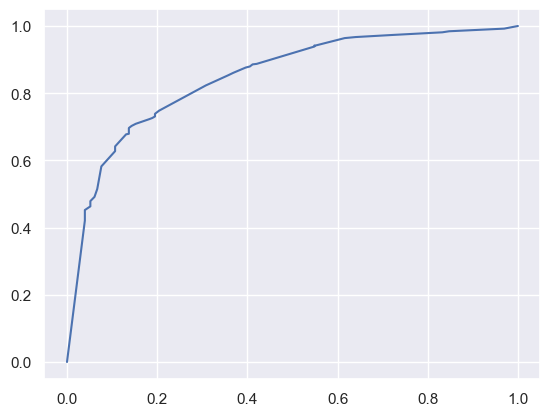

In [76]:
cmt=confusion_matrix(y_test,y_pred)
dist = ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels = [False, True]) #display_labels=[False,True])
dist.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

####################################################################################

y_predict_prob = DT.predict_proba(x_test)[:,1]
# print('y_predict_prob', y_predict_prob)

#####################################################################################3

fpr, tpr, thershold1 = roc_curve(y_test,y_predict_prob)
# print('FPR',fpr)
# print('TPR',tpr)
# print('thersholds',thershold1)
plt.plot(fpr,tpr)
plt.show()

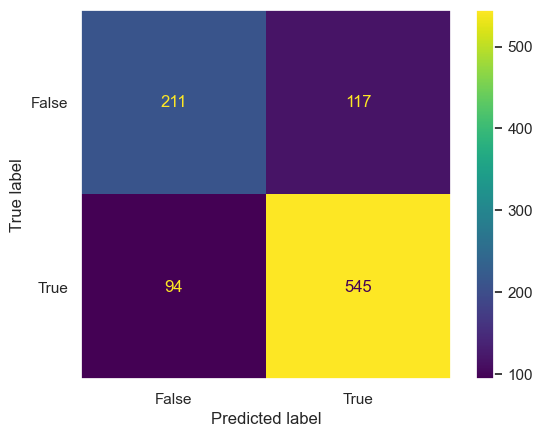

True negative: 211
False postive: 117
False negative: 94
True postive: 545


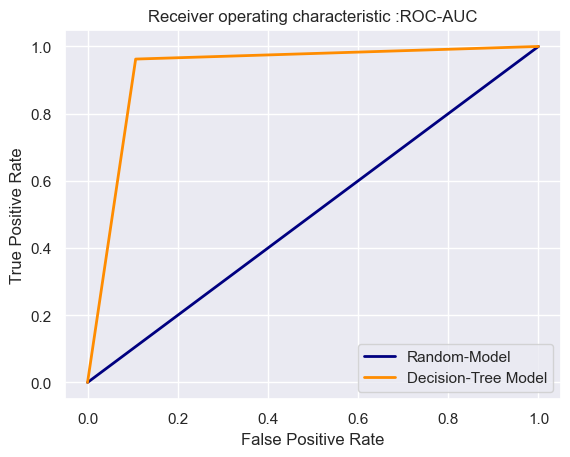

Computed Area Under the Curve (AUC) 0.9278669987404099


In [78]:
# ================================Step-7:Confusion matrix=========================================================================

cmt=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision-Tree Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
from sklearn.metrics import auc
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr)) 

### Apply GridSearch Crossvalidation on Naive Bayes

In [54]:
df.head(1)

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.3,0.0,0,381.51,974.81,1


In [55]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42) 

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(x_train, y_train)

GaussianNB()

In [56]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

- Priors: Allows you to specify prior probabilities for the classes, overriding the class prior probabilities learned from the data. For example, if you have a binary classification problem with classes "0" and "1" and you know that "0" occurs twice as frequently as "1" in your dataset, you can set priors=[0.67, 0.33] to reflect this prior knowledge.
- Var_smoothing: A small positive value added to the variances of all features in Gaussian Naive Bayes to prevent numerical instability and stabilize computation, particularly when dealing with features with zero variance.

In [57]:
# param_grid = {'priors' : [0.33,0.67]}
param_grid = {'priors': [None], 'var_smoothing': [0.000000001]}

In [58]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

scorings = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}

refit_metric = 'accuracy'

grid_search = GridSearchCV(NB, param_grid, scoring=scorings,refit=refit_metric , cv = 5, verbose=True)
grid_search

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [1e-09]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=True)

In [59]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [1e-09]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=True)

In [60]:
grid_search.best_estimator_

GaussianNB()

In [61]:
grid_search.best_score_

0.7425096356020873

In [62]:
grid_search.best_params_  # {'priors': [None], 'var_smoothing': [0.000000001]}

{'priors': None, 'var_smoothing': 1e-09}

In [63]:
accuracy_list = cross_val_score(grid_search.best_estimator_,
                                x_train,
                                y_train,
                                cv = 5,
                                scoring='accuracy')
accuracy_list

array([0.74289406, 0.71576227, 0.74160207, 0.76843467, 0.74385511])

In [64]:
accuracy_list.mean()

0.7425096356020873

### Naive Bayes on best hyperparametre

In [65]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB( priors=None, var_smoothing=0.000000001)

NB.fit(x_train,y_train)

GaussianNB()

In [66]:

y_pred = NB.predict(x_test)

acc_dt= accuracy_score(y_test,y_pred)*100
pre_dt= precision_score(y_test,y_pred)
rec_dt= recall_score(y_test,y_pred)
f1_dt= f1_score(y_test,y_pred)

print("accuracy is",acc_dt)
print("prescision is",pre_dt)
print("recall is",rec_dt)
print("f1 score is",f1_dt)

accuracy is 74.04343329886245
prescision is 0.8745173745173745
recall is 0.7089201877934272
f1 score is 0.7830596369922211


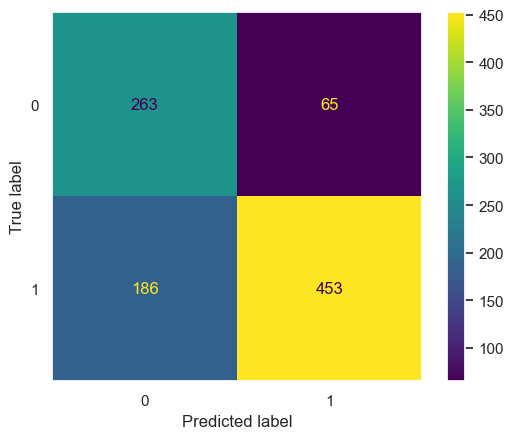

True negative: 263
False postive: 65
False negative: 186
True postive: 453
y_predict_prob [[9.90685261e-01 9.31473871e-03]
 [3.21864342e-09 9.99999997e-01]
 [1.12083097e-05 9.99988792e-01]
 ...
 [9.99974436e-01 2.55640945e-05]
 [6.53046069e-01 3.46953931e-01]
 [8.19823608e-20 1.00000000e+00]]
FPR [0.         0.07926829 0.07926829 0.07926829 0.08231707 0.08536585
 0.08536585 0.08841463 0.08841463 0.08841463 0.0945122  0.10060976
 0.10060976 0.10365854 0.10365854 0.1097561  0.1097561  0.11280488
 0.11280488 0.11890244 0.11890244 0.125      0.125      0.13109756
 0.13109756 0.13414634 0.13414634 0.1402439  0.1402439  0.14329268
 0.14329268 0.14634146 0.14634146 0.14939024 0.14939024 0.1554878
 0.1554878  0.15853659 0.15853659 0.16463415 0.16463415 0.16768293
 0.16768293 0.17987805 0.17987805 0.18597561 0.18597561 0.19207317
 0.19207317 0.19512195 0.19512195 0.20121951 0.20121951 0.20426829
 0.20426829 0.20731707 0.20731707 0.21036585 0.21036585 0.22256098
 0.22256098 0.22560976 0.22560976

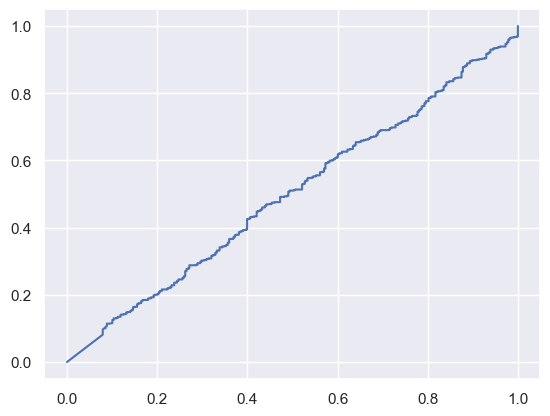

In [67]:
cmt=confusion_matrix(y_test,y_pred)
dist = ConfusionMatrixDisplay(cmt) #display_labels=[False,True])
dist.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

####################################################################################

y_predict_prob = NB.predict_proba(X_test)
print('y_predict_prob', y_predict_prob)

#####################################################################################3

fpr, tpr, thershold1 = roc_curve(y_test,y_predict_prob[:,1])
print('FPR',fpr)
print('TPR',tpr)
print('thersholds',thershold1)
plt.plot(fpr,tpr)
plt.show()